![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [395]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


In [17]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

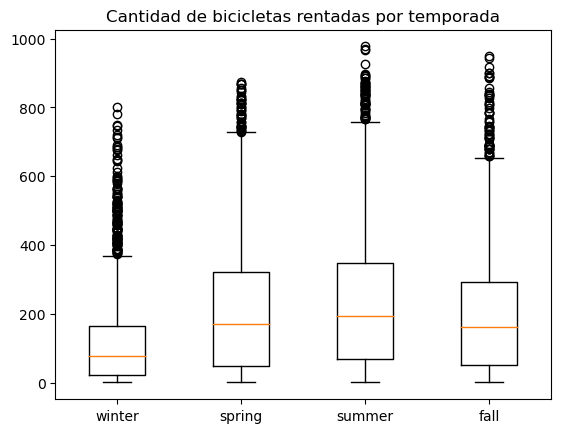

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [100]:
# Celda 1.1
bikes.groupby('season').total.mean().reset_index()

Nombres_temporadas= {1:'winter',2:'spring',3:'summer',4:'fall'}
sea_aux=bikes['season'].unique()

labeles=[]
for i in sea_aux:
    labeles.append(Nombres_temporadas[i])


boxplot_data = [bikes[bikes['season']==cat]['total'] for cat in bikes['season'].unique()]
plt.boxplot(boxplot_data, labels=labeles)
plt.title('Cantidad de bicicletas rentadas por temporada')
plt.show()
bikes.groupby('season').total.mean()

In [72]:
bikes.groupby(by='season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


La estación con menor número de rentas de bicicletas es la de invierno ('winter'), con 2686 registros.

La estación con mayor número de rentas de bicicletas es la de verano ('summer'), con 2733 registros para las estaciones de primavera ('spring') y otoño ('fall').

En promedio, la variable 'total' tiene el valor más alto en la estación de verano ('summer') con una media de 234.4 rentas de bicicletas, seguida por la primavera ('spring') con una media de 215.3 rentas de bicicletas.

La estación con la mayor variabilidad en la variable 'total' es también la de verano ('summer'), con una desviación estándar de 197.2 rentas de bicicletas, mientras que la estación de invierno ('winter') tiene la menor variabilidad con una desviación estándar de 125.3 rentas de bicicletas.

Los valores mínimo y máximo de la variable 'total' también son más altos en la estación de verano ('summer'), con un mínimo de 1 y un máximo de 977 rentas de bicicletas, mientras que la estación de invierno ('winter') tiene el valor mínimo más alto de 24 y el valor máximo más bajo de 801 rentas de bicicletas.

El 50% de las rentas de bicicletas en las estaciones de primavera ('spring') y otoño ('fall') tienen un valor de 'total' por debajo de 321 y 294, respectivamente. En la estación de verano ('summer'), el 50% de las rentas de bicicletas tienen un valor de 'total' por debajo de 195, mientras que en la estación de invierno ('winter') el 50% de las rentas de bicicletas tienen un valor de 'total' por debajo de 78.

**Cantidad promedio de biciletas rentadas por hora del día**

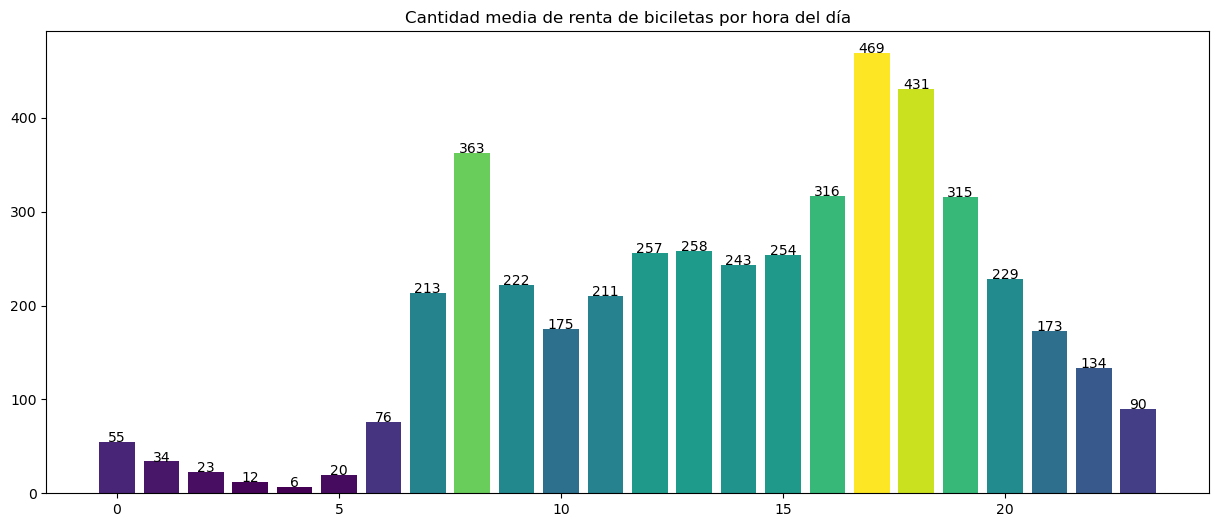

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [119]:
# Celda 1.2
#bikes.groupby('hour').total.mean()
plt.figure(figsize=(15,6))

y=bikes.groupby('hour').total.mean()
colors = plt.cm.viridis((y - min(y)) / (max(y) - min(y)))


plt.bar(x=bikes['hour'].unique(),height=y,color=colors)
plt.title('Cantidad media de renta de biciletas por hora del día')
for i in bikes['hour'].unique():
    plt.text(x=bikes['hour'].unique()[i],y=bikes.groupby('hour').total.mean()[i],s=round(bikes.groupby('hour').total.mean()[i]),ha='center')
plt.show()
bikes.groupby('hour').total.mean()

Coomo se puede observar existe una gran demanda de bicicletas en las horas 17-18, y en la mañanaa las 8. Esto podría tener sentido debido a que son las horas de salida e inicio de horario laboral respectivamente, por lo que los usuarios suelen dirigirse a sus trabajos utilizando este medio de transporte.

Durante el día existe una renta promedio de 240 biciletas mientras que durante la madrugada son las horas valle con menor demanda.

In [102]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


Hay un total de 456 horas registradas en la tabla, desde la hora 0  hasta la hora 23.

La cantidad promedio de bicicletas rentadas por hora varía significativamente a lo largo del día, con un máximo de 468.77 bicicletas en la hora 17 y un mínimo de 6.41 bicicletas en la hora 4.

La desviación estándar es mayor para las horas con mayores promedios, lo que indica que hay más variabilidad en la cantidad de bicicletas rentadas en esas horas.

El percentil 50% (mediana) de bicicletas rentadas por hora oscila entre 11 bicicletas en la hora 3 y 234.5 bicicletas en la hora 12.

El rango intercuartílico (75% - 25%) es más amplio para las horas con mayores promedios, lo que sugiere que hay más dispersión en los datos.

El valor máximo de bicicletas rentadas en una hora es de 970 en la hora 17, mientras que 
el valor mínimo es de 1 en la hora 2.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

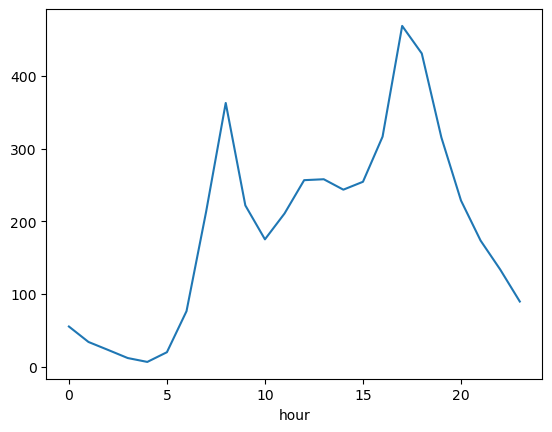

In [115]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

**Renta de biciletas promedio por hora en Winter**

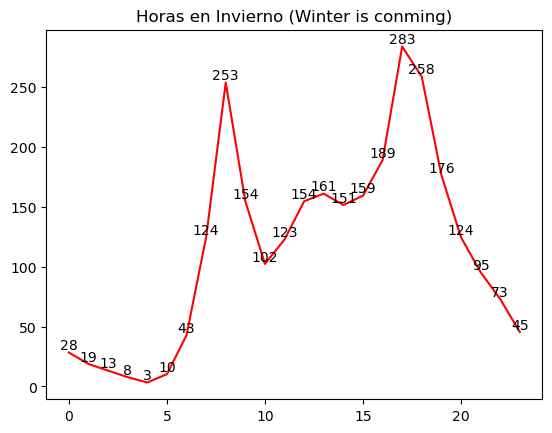

In [153]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_season1=bikes[bikes['season']==1]
data=bikes_season1.groupby('hour').total.mean()
hours =bikes_season1['hour'].unique()
plt.plot(hours,data,color = 'r')
for i in hours:
    plt.text(x=hours[i],y=data[i],s=round(data[i]),ha='center', va='bottom')
plt.title('Horas en Invierno (Winter is conming)')
plt.show()

La gráfica presentada de promedio de renta de biciletas por hora para la season Winter tiene un comportamiento muy similar a la gráfica con todas las estaciones a través de las horas, sin embargo los valores en el eje y son menores, esto debido a que como se analizó anteriormente es la estación con menor número de registros y bicicletas rentadas.

**Renta de biciletas promedio por hora en Summer**

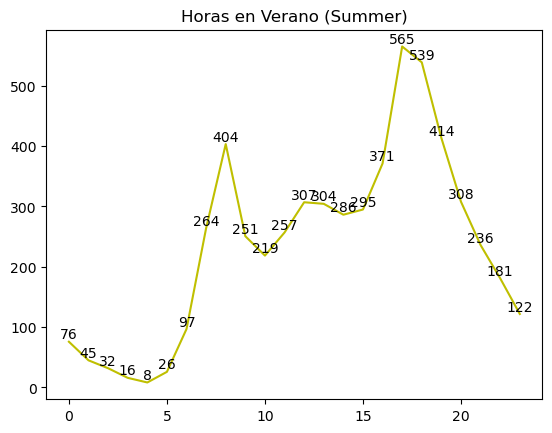

In [152]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_season3=bikes[bikes['season']==3]
data2=bikes_season3.groupby('hour').total.mean()
hours =bikes_season1['hour'].unique()
plt.plot(hours,data2,color = 'y')
for i in hours:
    plt.text(x=hours[i],y=data2[i],s=round(data2[i]),ha='center', va='bottom')
plt.title('Horas en Verano (Summer)')
plt.show()

La tendencia es similar en verano comparado con invierno y  durante el año completo, sin embargo ocurre lo contrario a lo que pasa en invierno, en este caso el promedio es mayor al promedio del año completo. Por lo anterior se hace necesario comparar las 3 gráficas en una sola para hacer un análisis completo.

**Comparación de los tres escenarios**

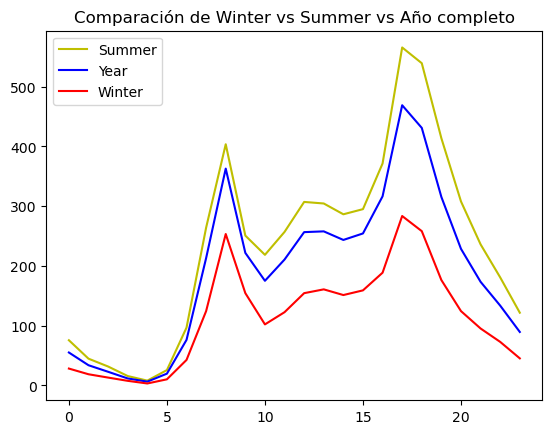

In [150]:
plt.plot(hours,data2,label='Summer',color = 'y')
plt.plot(hours,bikes.groupby('hour').total.mean(),label='Year', color='b')
plt.plot(hours,data,label='Winter',color='r')
plt.legend()
plt.title('Comparación de Winter vs Summer vs Año completo')
plt.show()

En la anterior gráfica se puede hacer un análisis completo de Verano, invierno y año completo, y se puede evidenciar lo que se comento anteriormente, aunque las 3 gráficas tienen la misma tendencia durante todas las horas del día, summer al ser el mes con mayor demanda de bicileta tiene un promedio mayor, mientras que Winter al tener una demanda menor tiene el promedio menor.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [320]:
# Celda 3
X=bikes[['season','hour']]
X = pd.get_dummies(X,columns=['season'],drop_first=True)
y=bikes['total']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X

lr = LinearRegression()
lr.fit(X_train, y_train)

mseLr = (1/y.shape[0]) * np.sum(np.square(y_pred - y))
print('El valor de MSE es de : ' + str(mseLr))

r_sq = lr.score(X_test, y_test)
print('Coeficiente de determinación (R²):', r_sq)

print('Intersección:', lr.intercept_)
pd.DataFrame(lr.coef_,X.columns).reset_index().rename(columns={'index':'Feature',0:'Pendiente'})

El valor de MSE es de : 14707.72861212221
Coeficiente de determinación (R²): 0.2195338224863328
Intersección: -6.861344746500805


,Feature,Pendiente
0,hour,10.539271
1,season_2,99.249356
2,season_3,118.613645
3,season_4,86.347878


Para interpretar correctamente los coeficientes del modelo de regresión lineal primero tuvimos que convertir la variable season a dummy, debido que está es categorica y no númerica, pues representa una estación.


Posterior a eso tenemos qué: el valor de el intercepto es de -6,86, lo cual puede llevar a una solución incorrecta debido a que no es posible que la demanda de biciletas sea negativa cuando sea la hora 0 y la estación actual sea invierno.

Por cada hora que avanza el día la renta de biciletas aumentará en 10.5, lo cual también llevará a una predicción incorrecta, debido a que como se evidencio en el análisis exploratorio durante las últimas horas del día se reduce la demanda ( a diferencia de lo que está haciendo el modelo).

Si la observación se da en la season 2 la renta de bicicletas aumentará a 99.24.
Si la observación se da en la season 3 la renta de bicicletas aumentará a 118.61.
Si la observación se da en la season 4 la renta de bicicletas aumentará a 86-34.

Por todo lo anterior el coef. de determinación del modelo es bajo, debido a que los datos no se ajustan a una regresión lineal.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [321]:
def funcion_costo(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    Error_Left= np.sum((y_l.mean()-y_l)**2)/y_l.shape[0] #Error cuadratico Left
    Error_Right=np.sum((y_r.mean()-y_r)**2)/y_r.shape[0] # Error cuadratico Right
    Cost_F = (Error_Left * y_l.shape[0]) + (Error_Right * y_r.shape[0]) 
    Cost_F
    return Cost_F
    

def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    best_split = [0, 0, 999999999999999999999]  # j, split, cost_function
    
    # Para todas las varibles 
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            fcost = funcion_costo(X.iloc[:, j], y, split)
                        
            if fcost < best_split[2]:
                best_split = [j, split, fcost]
    
    return best_split
best_split(X, y, num_pct=10)

[0, 8.0, 257735770.92005637]

In [365]:
def tree_grow(X, y, level=0, max_depth=None,num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1,fcost=0)
        return tree
    
    # Calcular la mejor división
    j, split, fcost = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean()
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0],fcost=fcost)
    # Revisar el criterio de parada 
    if max_depth is not None:
        if level >= max_depth:
            return tree 

    if fcost > 999999999999999999991:
        return tree

    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct)
    
    return tree
tree =tree_grow(X,y,level=0,max_depth=6, num_pct=10)

In [366]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted
y_pred=tree_predict(X, tree, proba=False)

y_pred
mse = (1/y.shape[0]) * np.sum(np.square(y_pred - y))
mse

14707.72861212221

El valor del MSE del arbol de decisión creado manualmente con solo 6 nodos no mejora comparando con la regresión lineal. Sin embargo agregandole más nodos el MSE puede mejorar.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

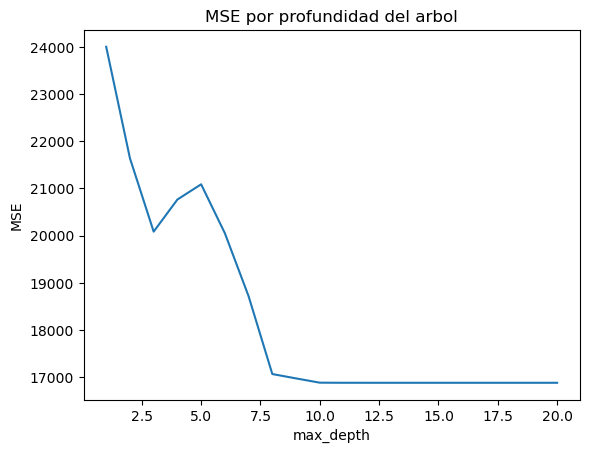

(16879.51608666945, 12)

In [352]:
# Celda 5

max_depth_range = range(1, 21)
MSE_Scores_list = []

for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    # Calcula el error cuadrático medio (MSE)
    mse_scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores  # convierte el error en positivo
    MSE_Scores_list.append(mse_scores.mean())

plt.plot(max_depth_range, MSE_Scores_list)
plt.xlabel('max_depth')
plt.ylabel('MSE')

plt.title('MSE por profundidad del arbol')
plt.show()

sorted(zip(MSE_Scores_list, max_depth_range))[::-1][-1]

In [362]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
1,season_2,0.043530
2,season_3,0.045750
3,season_4,0.061950
0,hour,0.848769


In [370]:
clf = DecisionTreeRegressor(max_depth=12, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mseDt = (1/y_test.shape[0]) * np.sum(np.square(y_pred - y_test))
mseDt

13354.69032697929

El MSE mejora mejora ligeramente comparando con los modelos anteriores con un valor de 13.354, la profundidad optima del arbol es de 12 (El cual obtiene el mejor MSE por Cross Validation.), y dentro de la importancia de las variables la más importante es 'Hour', lo cual tiene sentido debido a que como se analizó en un principio es donde más se encuentra la variabilidad de los datos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [379]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [380]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [381]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

**Arbol de decisión**

In [382]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 11)

accuracy_scores = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

(0.6353333333333333, 2)

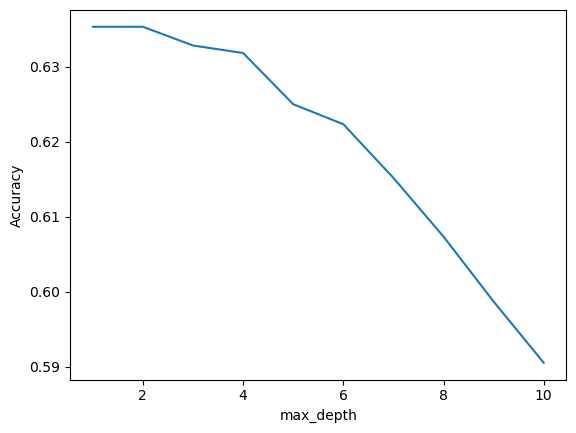

In [401]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

0.6453853046594982


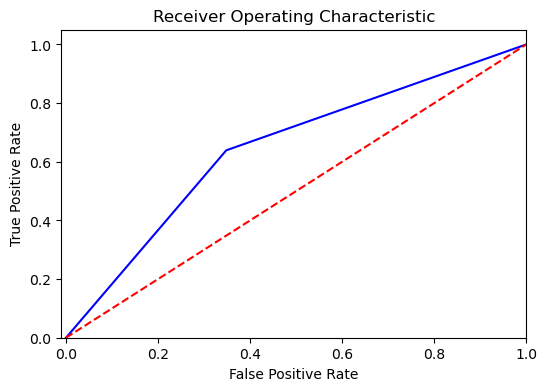

In [402]:
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
AUC1=metrics.auc(fpr, tpr)


plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC_Test = %0.2f' % AUC1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(AUC1)

In [407]:

accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy de : ' + str(accuracy))

report=metrics.classification_report(y_test, y_pred, output_dict=True)
dfr1 = pd.DataFrame(report).transpose()
dfr1

accuracy de : 0.6453333333333333


,precision,recall,f1-score,support
0,0.639842,0.651882,0.645806,744.000000
1,0.650943,0.638889,0.644860,756.000000
accuracy,0.645333,0.645333,0.645333,0.645333
macro avg,0.645393,0.645385,0.645333,1500.000000
weighted avg,0.645437,0.645333,0.645329,1500.000000


**Regresión Logística**

0.6453853046594982


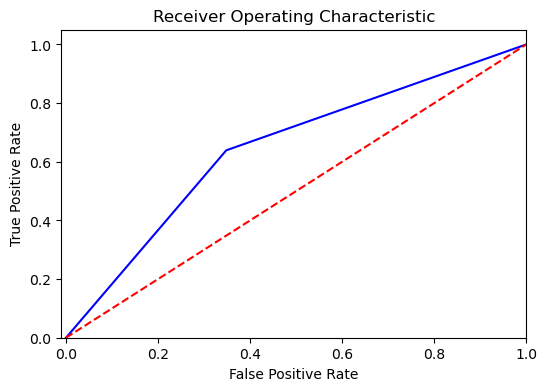

In [398]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
yPred_Proba = clf.predict(X_test)
yPred = np.where(yPred_Proba > 0.5, 1, 0)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
AUC2=metrics.auc(fpr, tpr)


plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC_Test = %0.2f' % AUC2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(AUC1)

In [408]:
accuracy = metrics.accuracy_score(y_test, yPred)
print('accuracy de : ' + str(accuracy))

report=metrics.classification_report(y_test, yPred, output_dict=True)
dfr2 = pd.DataFrame(report).transpose()
dfr2

accuracy de : 0.6126666666666667


,precision,recall,f1-score,support
0,0.606258,0.625000,0.615486,744.000000
1,0.619372,0.600529,0.609805,756.000000
accuracy,0.612667,0.612667,0.612667,0.612667
macro avg,0.612815,0.612765,0.612646,1500.000000
weighted avg,0.612868,0.612667,0.612623,1500.000000


**Comparación de modelos por Acuaraccy y F1_Score**

Observando los resultados de ambos modelos, podemos ver que el árbol de decisión obtuvo un accuracy de 0.645 y un F1-Score de 0.646 en promedio, mientras que la regresión logística obtuvo un accuracy de 0.613 y un F1-Score de 0.614 en promedio.

A partir de estos resultados, podemos concluir que el modelo de árbol de decisión tiene un mejor desempeño que el modelo de regresión logística en términos de accuracy y F1-Score. 

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Muestras bootstrap

In [422]:
#Creación de muestras Bootstrap
np.random.seed(123)

n_samples = X_train.shape[0]
n_B = 300

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

Establecemos los clasificadores:

In [440]:
clasificadores={}
for i, sample in enumerate(samples):
    if i < 100:
        clf_dt_1 = DecisionTreeClassifier(max_depth=12, random_state=1)
        clf_dt_1.fit(X_train.iloc[samples[i], :], y_train.iloc[samples[i]])
        clasificadores[i]=clf_dt_1
    elif i < 200:
        clf_dt_2 = DecisionTreeClassifier(min_samples_leaf=20, random_state=1)
        clf_dt_2.fit(X_train.iloc[samples[i], :], y_train.iloc[samples[i]])
        clasificadores[i]=clf_dt_2
    else:
        clf_rl = LogisticRegression()
        clf_rl.fit(X_train.iloc[samples[i], :], y_train.iloc[samples[i]])   
        clasificadores[i]=clf_rl

guardamos las predicciones de cada uno:

In [503]:
DT_1l=[]
DT_2l=[]
RLl=[]
for j,k in clasificadores.items():
  

    if j <100:
        DT_1l.append(k)
    elif j <200:
        DT_2l.append(k)        
    else:
        RLl.append(k)

print(len(DT_1l),len(DT_2l),len(RLl))

n_estimators= len(DT_1l)
y_pred_df_dt = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_dt.iloc[:, i] = DT_1l[i].predict(X_test)

n_estimators= len(DT_2l)
y_pred_df_dt_2 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_dt_2.iloc[:, i] = DT_2l[i].predict(X_test)

n_estimators= len(RLl)
y_pred_df_rl = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_rl.iloc[:, i] = RLl[i].predict(X_test)

y_pred_df.head()


100 100 100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2185,0,1,1,0,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,0
2520,1,1,0,0,1,1,1,1,0,0,...,1,0,1,1,1,1,1,0,0,1
3721,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3727,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Establecemos predicciones por votación mayoritaria

In [504]:
y_pred_dt = (y_pred_df_dt.sum(axis=1) >= (100 / 2)).astype(np.int)
y_pred_dt2 = (y_pred_df_dt_2.sum(axis=1) >= (100 / 2)).astype(np.int)
y_pred_rl= (y_pred_df_rl.sum(axis=1) >= (100 / 2)).astype(np.int)

Evaluación de F1_Score y Accuary

In [567]:
F1_Score_dt=metrics.f1_score(y_pred_dt, y_test)
F1_Score_dt_2=metrics.f1_score(y_pred_dt2, y_test)
F1_Score_rl=metrics.f1_score(y_pred_rl, y_test)

Acc_dt = metrics.accuracy_score(y_pred_dt, y_test)
Acc_dt_2 =metrics.accuracy_score(y_pred_dt2, y_test)
Acc_rl = metrics.accuracy_score(y_pred_rl, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt, pos_label=1)
AUC_dt=metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt2, pos_label=1)
AUC_dt2=metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rl, pos_label=1)
AUC_rl=metrics.auc(fpr, tpr)

#pd.DataFrame(index=['Decision_Tree_Max_Depth','Decision_Tree_Min_samples','Logistic_regreson'],[[F1_Score_dt,Acc_dt],[F1_Score_dt_2,Acc_dt_2],[F1_Score_rl,Acc_rl]])


data = {'Decision_Tree_Max_Depth': [F1_Score_dt, Acc_dt],
        'Decision_Tree_Min_samples': [F1_Score_dt_2, Acc_dt_2],
        'Logistic_regreson': [F1_Score_rl, Acc_rl]}

df = pd.DataFrame(data=data, index=['F1 Score', 'Accuracy'])
df

,Decision_Tree_Max_Depth,Decision_Tree_Min_samples,Logistic_regreson
F1 Score,0.661017,0.660961,0.611525
Accuracy,0.653333,0.656667,0.618000


Se puede concluir que el modelo de árbol de decisión con una profundidad máxima de 12 es ligeramente mejor que el modelo de árbol de decisión con un número mínimo de muestras de 20 y el modelo de regresión logística.

Esto se debe a que el modelo de árbol de decisión con profundidad máxima 12 tiene el F1 score más alto de los tres modelos (0.661017), mientras que el modelo de árbol de decisión con el número mínimo de muestras 20 tiene un F1 score ligeramente menor (0.660961). El modelo de regresión logística tiene el F1 score más bajo (0.611525).

En cuanto a la precisión, los resultados son similares. El modelo de árbol de decisión con profundidad máxima 12 tiene la precisión más alta (0.653333), seguido del modelo de árbol de decisión con el número mínimo de muestras 20 (0.656667) y el modelo de regresión logística (0.618000).

**Ensamblaje de modelos**

In [568]:
ensamblaje = pd.concat([y_pred_df_dt, y_pred_df_dt_2, y_pred_df_rl], axis=1)
y_pred_ensamblaje = (ensamblaje.sum(axis=1) >= (100 / 2)).astype(np.int)

F1_Score_Ensamblaje=metrics.f1_score(y_pred_ensamblaje, y_test)
Acc_Ensamblaje=metrics.accuracy_score(y_pred_ensamblaje, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ensamblaje, pos_label=1)
AUC_ensamblaje_mayor=metrics.auc(fpr, tpr)

data = {'Decision_Tree_Max_Depth_12': [F1_Score_dt, Acc_dt],
        'Decision_Tree_Min_samples_20': [F1_Score_dt_2, Acc_dt_2],
        'Logistic_regreson': [F1_Score_rl, Acc_rl],
        'Modelo de ensamblaje': [F1_Score_Ensamblaje,Acc_Ensamblaje]}

df = pd.DataFrame(data=data, index=['F1 Score', 'Accuracy'])
df

,Decision_Tree_Max_Depth_12,Decision_Tree_Min_samples_20,Logistic_regreson,Modelo de ensamblaje
F1 Score,0.661017,0.660961,0.611525,0.707510
Accuracy,0.653333,0.656667,0.618000,0.605333


El modelo de ensamblaje tiene el mayor F1_Score lo que sugiere que es capaz de capturar mejor la complejidad del problema. El F1 score del modelo de ensamblaje es de 0.707510, que es significativamente más alto que el F1 score de los tres modelos individuales anteriores, que oscilan entre 0.611525 y 0.661017.

En cuanto a la precisión, el modelo de ensamblaje tiene un rendimiento ligeramente inferior al de los modelos de árbol de decisión individuales, pero aún así es mejor que el modelo de regresión logística. La precisión del modelo de ensamblaje es de 0.605333, mientras que la precisión de los modelos de árbol de decisión individuales oscila entre 0.653333 y 0.656667, y la precisión del modelo de regresión logística es de 0.618000.

En general, el modelo de ensamblaje parece ser el mejor modelo en términos de F1 score, aunque su precisión es ligeramente inferior a la de los modelos de árbol de decisión individuales. Se recomienda realizar pruebas adicionales y validación cruzada para confirmar que este modelo es el mejor para su problema en particular.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [522]:
# Celda 8
samples_oob = []
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [557]:
errors = np.zeros(300)

for i in range(300):
    y_pred_ = clasificadores[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

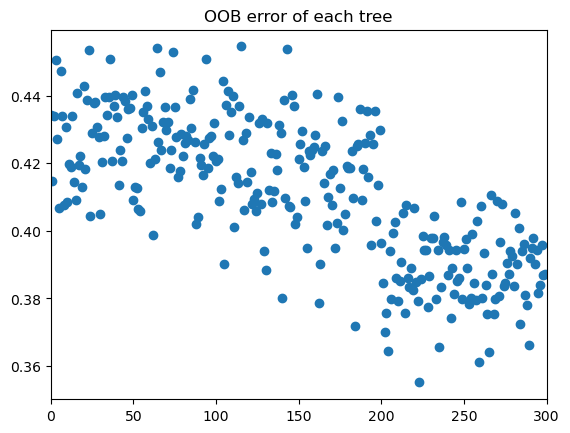

In [558]:
# Visualización de OOB para cada árbol
plt.scatter(range(300), errors)
plt.xlim([0, 300])
plt.title('OOB error of each tree')

In [563]:
alpha = (1 - errors) / (1 - errors).sum()
weighted_sum_1 = ((ensamblaje) * alpha).sum(axis=1)
weighted_sum_1.head(20)
y_pred_Pond = (weighted_sum_1 >= 0.5).astype(np.int)


metrics.f1_score(y_pred_Pond, y_test), metrics.accuracy_score(y_pred_Pond, y_test)

(0.6195286195286195, 0.6233333333333333)

In [569]:
accuracy_Pond = metrics.accuracy_score(y_test, y_pred_Pond)
print('accuracy de : ' + str(accuracy_Pond))

F1_Score_pond = metrics.f1_score(y_test, y_pred_Pond)
print('F1_Score de : ' + str(F1_Score_pond))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_Pond, pos_label=1)
AUC_Ponderada =metrics.auc(fpr, tpr)


accuracy de : 0.6233333333333333
F1_Score de : 0.6195286195286195


 El F1 score del modelo de ensamblaje ponderado es de 0.6195286195286195, que es similar al F1 score del modelo de regresión logística individual anterior (0.611525) y un poco más bajo que los F1 scores de los modelos de árbol de decisión individuales (que oscilan entre 0.660961 y 0.661017).

En cuanto a la precisión, el modelo de ensamblaje ponderado tiene un rendimiento ligeramente inferior al de los modelos de árbol de decisión individuales, pero aún así es mejor que el modelo de regresión logística individual. La precisión del modelo de ensamblaje ponderado es de 0.6233333333333333, mientras que la precisión de los modelos de árbol de decisión individuales oscila entre 0.653333 y 0.656667, y la precisión del modelo de regresión logística es de 0.618000.

En general, el modelo de ensamblaje ponderado parece tener un rendimiento ligeramente inferior al de los modelos de árbol de decisión individuales y un rendimiento similar al de la regresión logística individual.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [576]:
# Celda 9
data = {'Decision_Tree_Max_Depth_12': [F1_Score_dt, Acc_dt],
        'Decision_Tree_Min_samples_20': [F1_Score_dt_2, Acc_dt_2],
        'Logistic_regreson': [F1_Score_rl, Acc_rl],
        'Modelo de ensamblaje por votación mayoritaria': [F1_Score_Ensamblaje,Acc_Ensamblaje],
        'Modelo de ensamblaje por votación ponderada' : [F1_Score_pond,accuracy_Pond]}

df_final = pd.DataFrame(data=data, index=['F1 Score', 'Accuracy']).T.reset_index()
df_final

,index,F1 Score,Accuracy
0,Decision_Tree_Max_Depth_12,0.661017,0.653333
1,Decision_Tree_Min_samples_20,0.660961,0.656667
2,Logistic_regreson,0.611525,0.618000
3,Modelo de ensamblaje por votación mayoritaria,0.707510,0.605333
4,Modelo de ensamblaje por votación ponderada,0.619529,0.623333


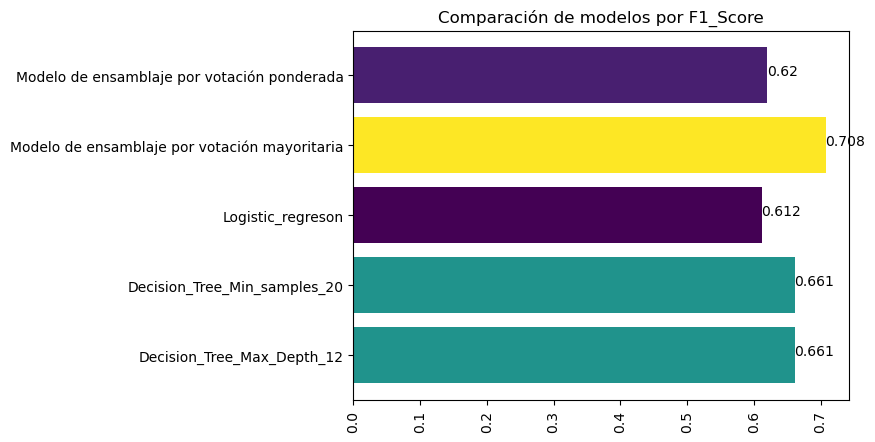

In [610]:
x2= df_final['index']
height2 = df_final['F1 Score']

colors = plt.cm.viridis((height2 - min(height2)) / (max(height2) - min(height2)))

for i, v in enumerate(height2):
    plt.text(v, i, str(round(v,3)))

plt.title('Comparación de modelos por F1_Score')
plt.barh(x2,height2,color=colors)
plt.xticks(rotation=90)
plt.show()

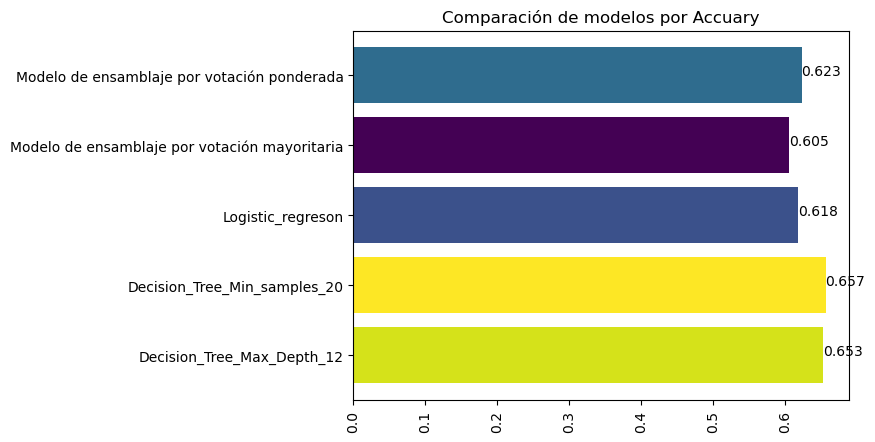

In [611]:
x2= df_final['index']
height2 = df_final['Accuracy']

colors = plt.cm.viridis((height2 - min(height2)) / (max(height2) - min(height2)))

for i, v in enumerate(height2):
    plt.text(v, i, str(round(v,3)))

plt.title('Comparación de modelos por Accuary')
plt.barh(x2,height2,color=colors)
plt.xticks(rotation=90)
plt.show()

**Conclusiones**

El modelo de ensamblaje por votación mayoritaria parece ser la mejor opción para predecir la popularidad de un artículo en las redes sociales, ya que tuvo el mejor rendimiento en términos de F1 Score. Esto sugiere que combinar los tres modelos anteriores resultó en una mejora significativa en la capacidad de predecir si un artículo será popular o no. La principal ventaja del modelo de ensamblaje por votación mayoritaria es que mejora la predicción al combinar varios modelos debido a que reduce la varianza al combinar modelos con alta varianza.

Los modelos de árbol de decisión pueden ser una buena opción para aquellos que buscan una alta precisión en las predicciones, ya que tuvieron un buen rendimiento en términos de exactitud. Sin embargo, su rendimiento en términos de F1 Score fue ligeramente inferior al del modelo de ensamblaje por votación mayoritaria. Los arboles de decisión adicional son facilmente interpretables, y ademas es eficiente a grandes conjuntos de datos.

El modelo de regresión logística, aunque no tuvo un rendimiento tan bueno como los modelos de árbol de decisión, todavía puede ser útil para predecir la popularidad de un artículo en las redes sociales. Una de las ventajas de usar Regresión Logistica es que son modelos facilmente interpretable, y que no requiere muchos ajuste y es ideal para problemas de clasificación binaria, sin embargo al ser un problema lineal puede afectar su nivel predictivo.

Es importante tener en cuenta que estos modelos fueron entrenados y evaluados en un conjunto de datos específico, y es posible que su rendimiento en datos nuevos sea diferente. Además, hay que tener en cuenta que la popularidad de un artículo en las redes sociales puede estar influenciada por muchos otros factores que no están incluidos en este conjunto de datos